In [56]:
from qiskit import *
from qiskit_aer import Aer

circuit = QuantumCircuit(2, 2)

# quantum _register = QuantumRegister(2)
# classical_register = ClassicalRegister(2)
# circuit = QuantumCircuit(quantum_register, classical_register)


In [57]:
%matplotlib inline

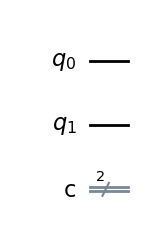

In [58]:

circuit.draw(output='mpl')

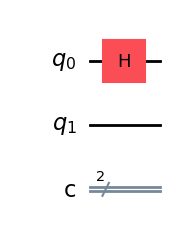

In [59]:
circuit.h(0)
circuit.draw(output='mpl')

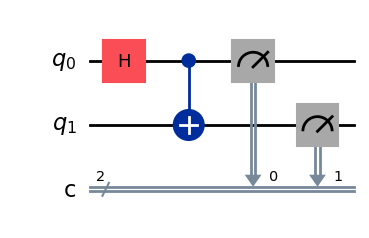

In [60]:
circuit.cx(0,1) # 0 -> control qubit, 1-> target qubit
circuit.measure([0,1],[0,1])
circuit.draw(output='mpl')

In [61]:
simulator = Aer.get_backend('qasm_simulator')

In [62]:
# Transpile the circuit for the simulator
compiled_circuit = transpile(circuit,simulator)

In [63]:
from qiskit.visualization import plot_histogram

In [64]:
# Execute the circuit on the simulator
result = simulator.run(compiled_circuit).result()

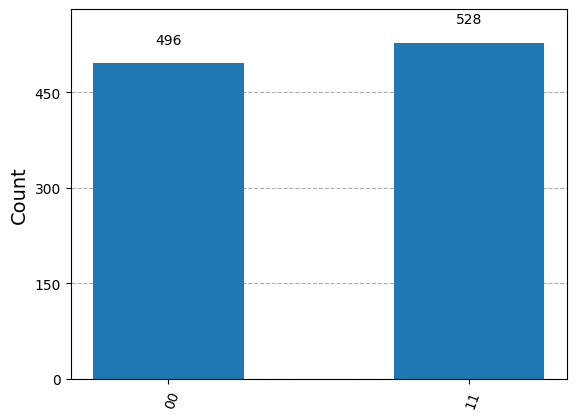

In [65]:
plot_histogram(result.get_counts(compiled_circuit))